<a href="https://colab.research.google.com/github/Manjiri1101/CMPE255-Manjiri/blob/main/Assighment6/Assignment6_gradientboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 : Gradient Boost Algorithm
## Name: Manjiri Kadam
### CMPE 255 - Data Mining
### Student ID : 015312076

## Write one or more colabs to demonstrate gradient boost methods with proper results visualizations

 

1.  Showcase  gbm classifier techniques
XGBoost, Catboost, LightGBM, randomforest, adaboost, decision tree classifier in the colab hint: https://docs.google.com/presentation/d/19j3wC-8_cz41CIm88F6kOFU8ys7zVcRfaBw6SImAeWc/edit#slide=id.ga2af525914_0_5665

2.  Showcase gradient boost regression techniques XGBoost, Catboost, LightGBM

3.  showcase gradient boost ranking techniques XGBoost, Catboost, LightGBM


# Dataset Used : [Boston Housing data](https://www.kaggle.com/vikrishnan/boston-house-prices)

In this assignment, I am looking for the house price prediction using various regressior methods using gradient boost algorithms

In [1]:
!pip install --upgrade gensim
!pip install catboost
!pip install shap

     |████████████████████████████████| 24.1 MB 5.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 564 kB 5.4 MB/s 


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier

import pickle
import gensim
import sklearn
import seaborn as sns
import wordcloud
import nltk
import unicodedata
# import contractions
from numpy import mean
# from contractions import contractions_dict
from gensim.similarities.annoy import AnnoyIndexer
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')

from time import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor



tokenizer = ToktokTokenizer()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from catboost import CatBoostRanker, Pool, MetricVisualizer
import catboost as cb
import shap
shap.initjs()
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder

from sklearn.datasets import load_boston
boston = load_boston()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#Read the dataset as a dataframe:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Mining/Dataset/housing.csv')
#Displaying the data:
df.head(5)
df_fb=df.copy()

In [9]:
# Initializing the dataframe
df = pd.DataFrame(boston.data)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['PRICE'] = boston.target 


In [15]:
df.shape

(506, 14)

In [37]:
df.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
243,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
corr = df.corr()
corr.shape

(14, 14)

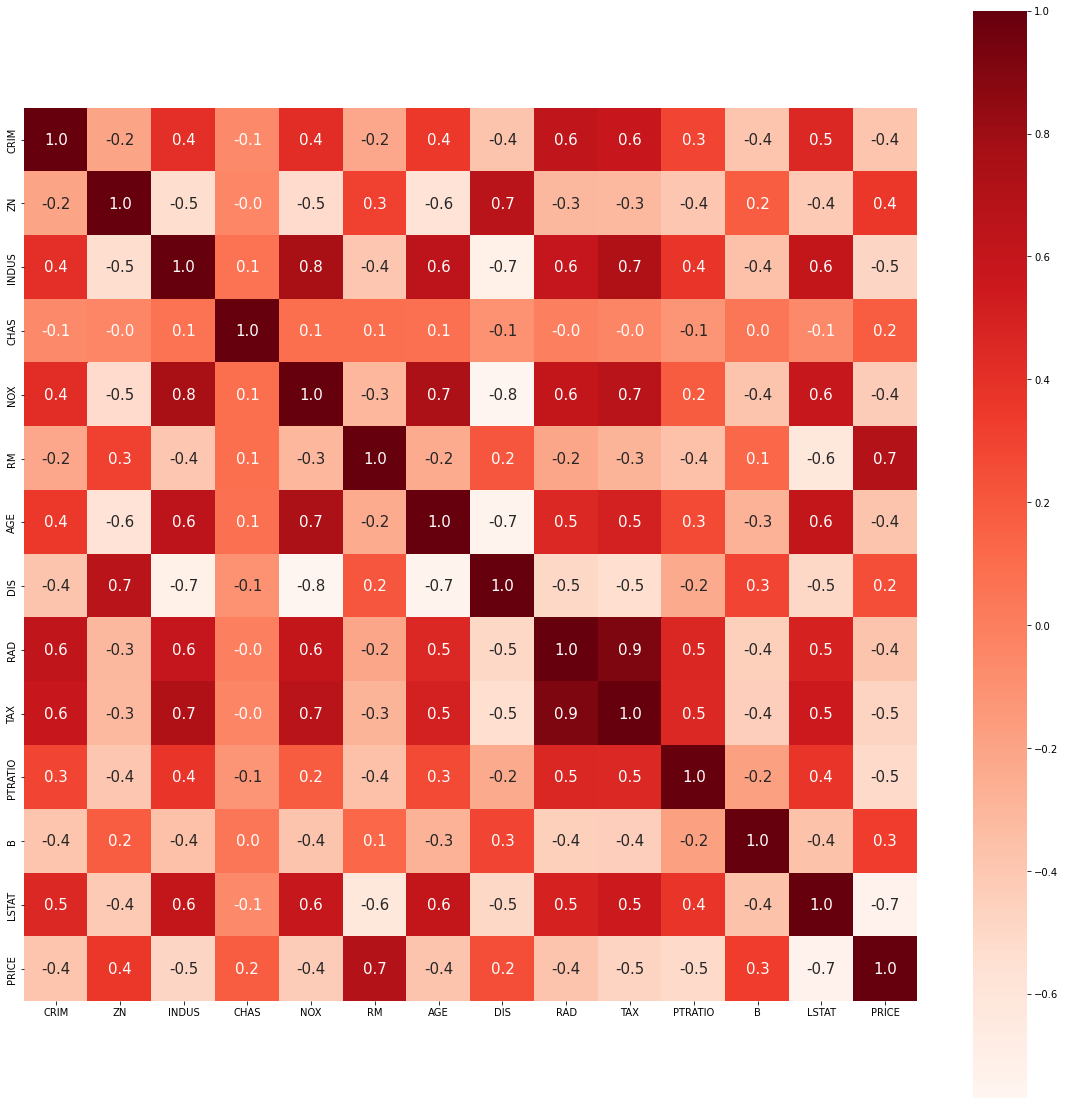

In [20]:
#plotting correlation matrix:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [23]:
# Spliting target variable and independent variables
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model using the muller loop

In [38]:
# X_sc = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

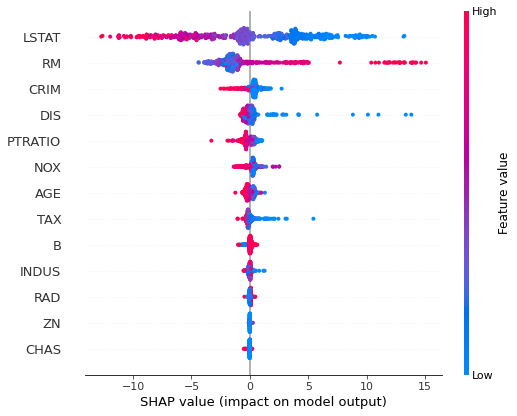

In [39]:
ranfrcls = RandomForestRegressor()
ranfrcls.fit(X_train,y_train)
explainer = shap.TreeExplainer(ranfrcls)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [43]:
regressors = []
regressors.append(('Linear Regression', LinearRegression(), False))
# regressors.append(('Logistic Regression', LogisticRegression(), False))
regressors.append(('KNN Regression', KNeighborsRegressor(n_neighbors=2, weights='uniform'), False))
regressors.append(('Random Forest Regression', RandomForestRegressor(n_estimators = 500, random_state = 102), False))
regressors.append(('AdaBoost Regression', AdaBoostRegressor(n_estimators=50, random_state=None), False))
regressors.append(("Cat Boost", CatBoostRegressor(loss_function="RMSE"), True))
regressors.append(("Light Gradient Boosting", LGBMRegressor(), True))
regressors.append(("EXtreme Gradient Boosting", XGBRegressor(objective='reg:squarederror'), True))

In [47]:
def regressor_loop(models, X_train, X_test, y_train, y_test, X, y):
  results = []
  trained_models = []
  for (name, model, flag) in models:
    print(name)
    start_time = time()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    model.fit(X_train, y_train)
    run_time = time() - start_time
    trained_models.append([name, model])

    # if flag == True:
    #   print("Model: ", name)
    #   print("******************")
    accuracy = model.score(X_test, y_test)
    results.append([name, np.mean(n_scores), accuracy, run_time])
  return results, trained_models

In [48]:
result_final, trained_models = regressor_loop(regressors, X_train, X_test, y_train, y_test, X, y)

Linear Regression
KNN Regression
Random Forest Regression
AdaBoost Regression
Cat Boost
Learning rate set to 0.03548
0:	learn: 8.8296182	total: 2.76ms	remaining: 2.76s
1:	learn: 8.6346249	total: 5.03ms	remaining: 2.51s
2:	learn: 8.4334504	total: 7.29ms	remaining: 2.42s
3:	learn: 8.2616631	total: 9.87ms	remaining: 2.46s
4:	learn: 8.1156434	total: 12.2ms	remaining: 2.42s
5:	learn: 7.9543738	total: 14.6ms	remaining: 2.42s
6:	learn: 7.8026890	total: 17ms	remaining: 2.41s
7:	learn: 7.6388812	total: 19.2ms	remaining: 2.38s
8:	learn: 7.4986964	total: 21.5ms	remaining: 2.37s
9:	learn: 7.3532683	total: 23.9ms	remaining: 2.37s
10:	learn: 7.2183943	total: 26.1ms	remaining: 2.35s
11:	learn: 7.0915686	total: 28.6ms	remaining: 2.36s
12:	learn: 6.9501610	total: 31.1ms	remaining: 2.36s
13:	learn: 6.8136610	total: 33.5ms	remaining: 2.36s
14:	learn: 6.7045778	total: 35.8ms	remaining: 2.35s
15:	learn: 6.5720221	total: 38.1ms	remaining: 2.34s
16:	learn: 6.4540737	total: 40.7ms	remaining: 2.35s
17:	learn: 

In [49]:
results = pd.DataFrame(result_final, columns=['Model Name', 'Mean', 'Accuracy', 'Time Taken'])
results

,Model Name,Mean,Accuracy,Time Taken
0,Linear Regression,0.710744,0.776146,0.227680
1,KNN Regression,0.451473,0.499138,0.260795
2,Random Forest Regression,0.862807,0.903068,43.597698
3,AdaBoost Regression,0.823909,0.853320,3.043339
4,Cat Boost,0.896508,0.916005,101.621144
5,Light Gradient Boosting,0.864241,0.910672,1.547512
6,EXtreme Gradient Boosting,0.878015,0.907042,1.358364


Applied Muller loop for the regression model, and in the result dataframe you can see the results.

Thanks